In [2]:
import pandas as pd
import numpy as np

c:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('spamm.csv')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1261,ham,Thank you so much. When we skyped wit kz and s...,NaN,NaN,NaN
3602,ham,"I'm not sure, I was just checking out what was...",NaN,NaN,NaN
4973,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...,NaN,NaN,NaN
3162,spam,This is the 2nd time we have tried to contact ...,NaN,NaN,NaN
2262,ham,It should take about &lt;#&gt; min,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. website
# 8. Deployment

## Data Cleaning


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
2743,ham,But my family not responding for anything. Now...
4313,ham,Is ur changes 2 da report big? Cos i've alread...
4272,ham,Kind of. Just missed train cos of asthma attac...
2137,ham,Then why you came to hostel.
3507,ham,"Camera quite good, 10.1mega pixels, 3optical a..."


In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#missing values check
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#check for duplicate values
df.duplicated().sum()

403

In [18]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 2)

## EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.value_counts('target')

target
0    4516
1     653
Name: count, dtype: int64

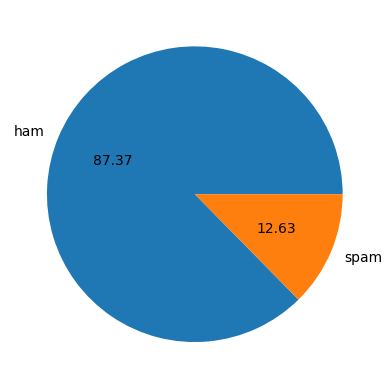

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [23]:
# data imbalance

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
## to find the no of chars, no of words, no of sentences. we use  nltk

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#numbers of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.894177,18.456568,1.966531
std,58.162207,13.325487,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
## analysing ham and spam separately

In [35]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe() ## for ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.424048,17.123561,1.820195
std,56.337668,13.493783,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe() ## for spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.471669,27.675345,2.978560
std,30.019848,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [37]:
import seaborn as sns

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

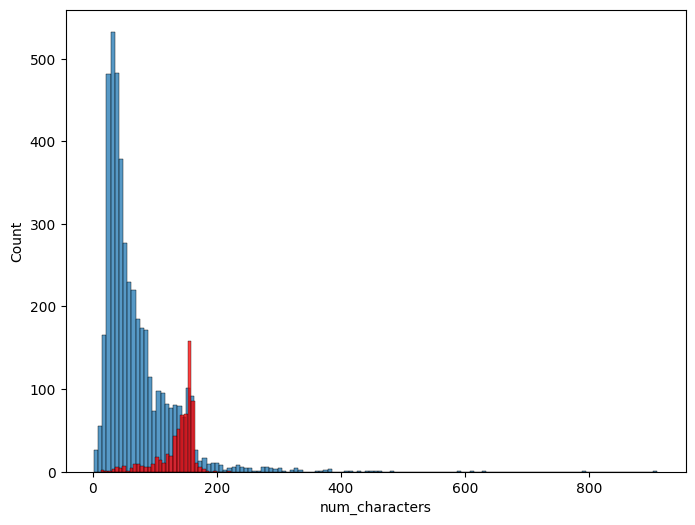

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')## visualization for patterens,spam has more whereas ham has less.

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

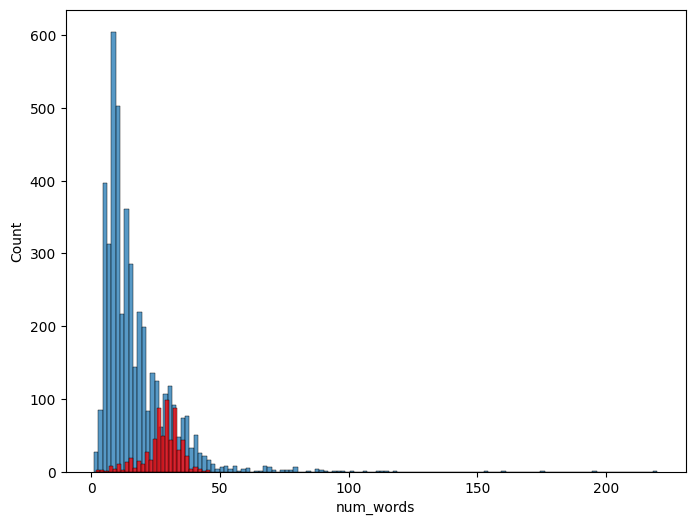

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')## visualization for patterens,spam has more whereas ham has less.

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

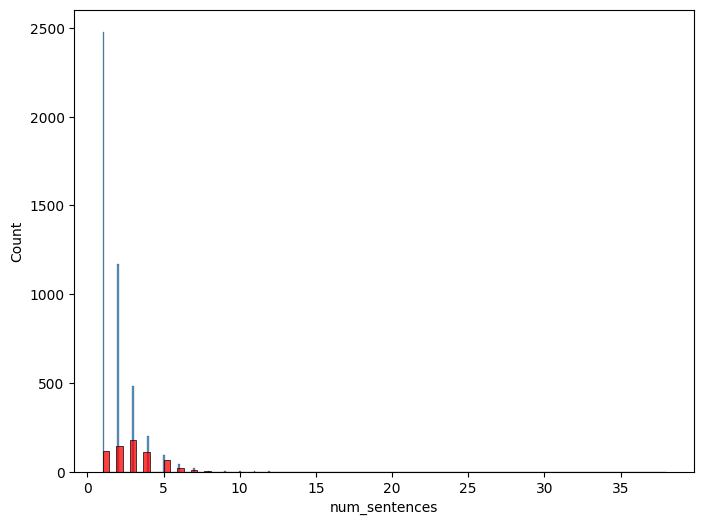

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color = 'red')## visualization for patterens,spam has more whereas ham has less.

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

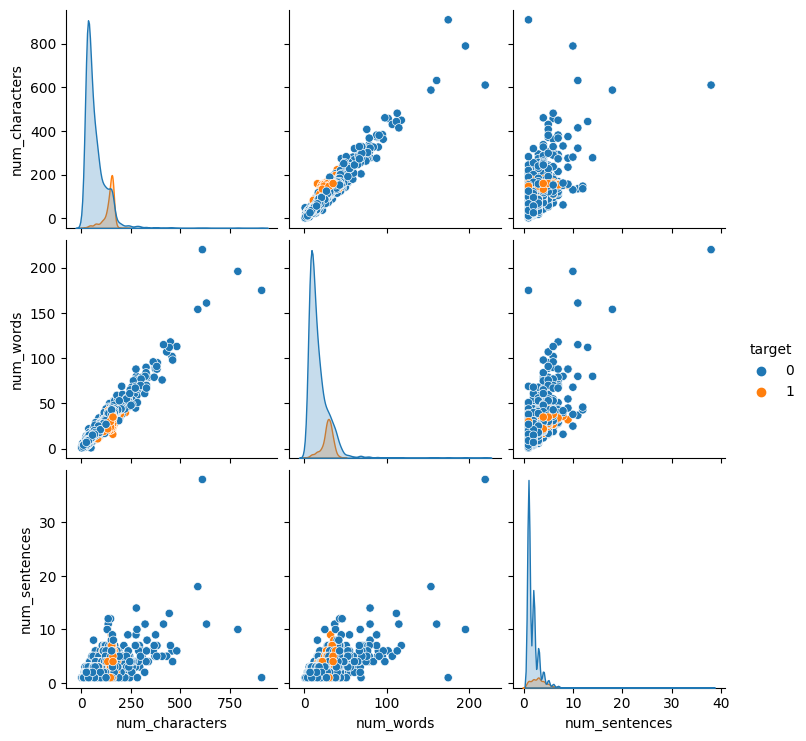

In [41]:
##for finding relation between the columns like num_words, num_characters, num_sentences
sns.pairplot(df,hue = 'target')

<Axes: >

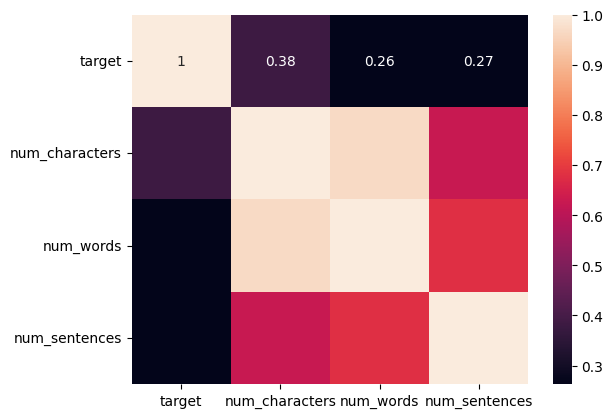

In [42]:
## finding correlation coefficient
num_df = df.select_dtypes(include = [np.number])
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix,annot = True)


In [43]:
## understood num_characters are having more collinearity with tager variable.so keeping num_chaarcters would be best.

## Data Preprocessing
    1. lowercase
    2. Tokenization
    3. Removing special characters
    4. Removing stop words and punctuation
    5. stemming or lemmatiser

In [44]:
import nltk

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string

In [47]:
# string.punctuation

In [48]:
# for stemming or lemmatizers
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('lv')

'lv'

In [49]:
def transform_text(text):
    # to lowerCase
    text = text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)
    
    # removing special characters
    y = []
    for i in text:
        if i.isalnum() == True:
            y.append(i)
    
    # removing stop words and punctuation
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 
    
    # stemming or lemmatizer
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [50]:
transform_text("SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info")

'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info'

In [51]:
df['text'][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

KeyboardInterrupt: 

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height = 500,min_font_size = 10,background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

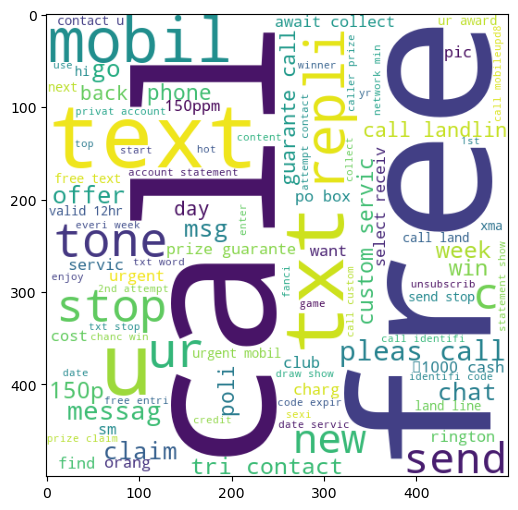

In [ ]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

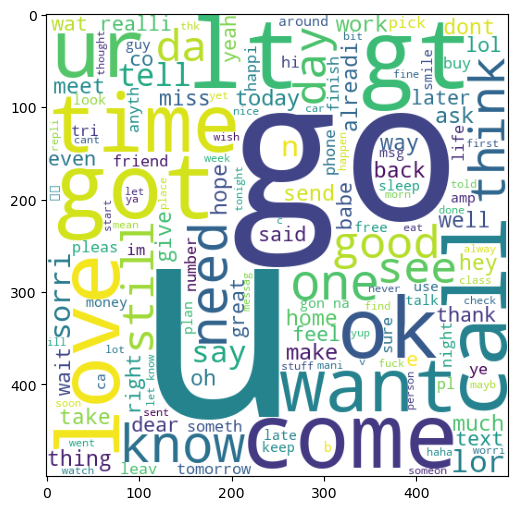

In [ ]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for i in df[df['target']==1]['transformed_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

10133

In [ ]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '螢900',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 

In [ ]:
from collections import Counter

In [ ]:
x = pd.DataFrame(Counter(spam_corpus).most_common(25))[0]
y = pd.DataFrame(Counter(spam_corpus).most_common(25))[1]

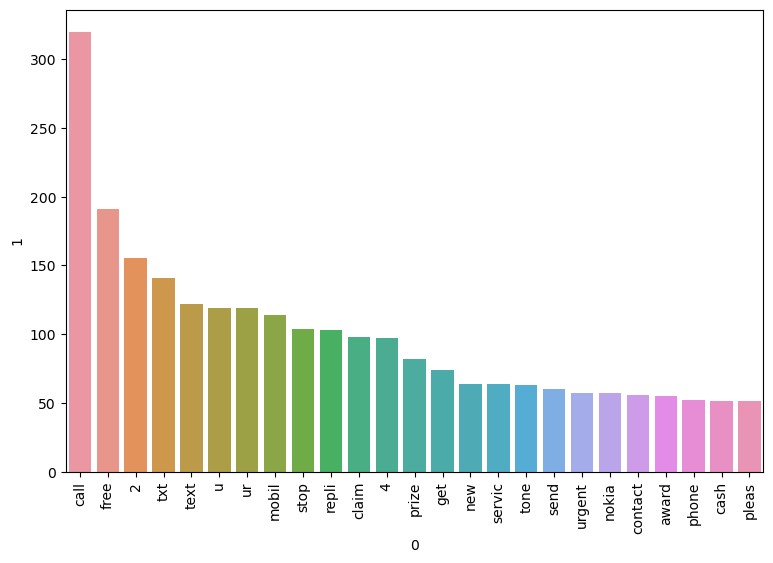

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(x = x,y = y)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for i in df[df['target']==0]['transformed_text'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [ ]:
x = pd.DataFrame(Counter(ham_corpus).most_common(25))[0]
y = pd.DataFrame(Counter(ham_corpus).most_common(25))[1]

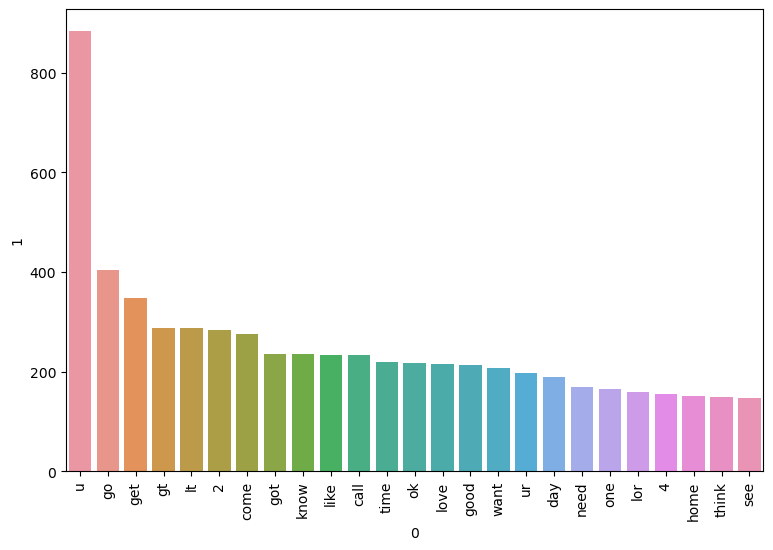

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(x = x,y = y)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
len(ham_corpus)

35421

## Model Building

In [ ]:
## converting text to vectors(numbers) for model building

## bag of words
## TFIDF
## wordto vec

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# appending the num_characters col to x
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(5169, 3000)

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df.sample(5)

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[787 109]
 [ 23 115]]
0.5133928571428571


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

## when the data is imbalance dont see the accuracy. just go with precision

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
## choosen mutltinomial naive bayes -->> Tfidf vectorization

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print(current_accuracy)
    print(current_precision)
    print("\n","*"*50,"\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

0.9748549323017408
0.9745762711864406

 ************************************************** 

0.9052224371373307
1.0

 ************************************************** 

0.9709864603481625
1.0

 ************************************************** 

0.9361702127659575
0.8673469387755102

 ************************************************** 

0.9584139264990329
0.9702970297029703

 ************************************************** 

0.9709864603481625
0.990909090909091

 ************************************************** 

0.9632495164410058
0.9629629629629629

 ************************************************** 

0.9574468085106383
0.8852459016393442

 ************************************************** 

0.9758220502901354
0.9747899159663865

 ************************************************** 

0.9468085106382979
0.9278350515463918

 ************************************************** 

0.9680851063829787
0.9487179487179487

 ************************************************** 



In [ ]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values(by='Precision', ascending = False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.899420,1.000000
2,NB,0.957447,1.000000
5,RF,0.972921,0.982456
8,ETC,0.975822,0.974790
0,SVC,0.973888,0.974359
6,AdaBoost,0.962282,0.954128
4,LR,0.950677,0.939394
10,xgb,0.970019,0.934959
9,GBDT,0.950677,0.891892
7,BgC,0.960348,0.875969


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.899420
1,NB,Accuracy,0.957447
2,RF,Accuracy,0.972921
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.973888
5,AdaBoost,Accuracy,0.962282
6,LR,Accuracy,0.950677
7,xgb,Accuracy,0.970019
8,GBDT,Accuracy,0.950677
9,BgC,Accuracy,0.960348


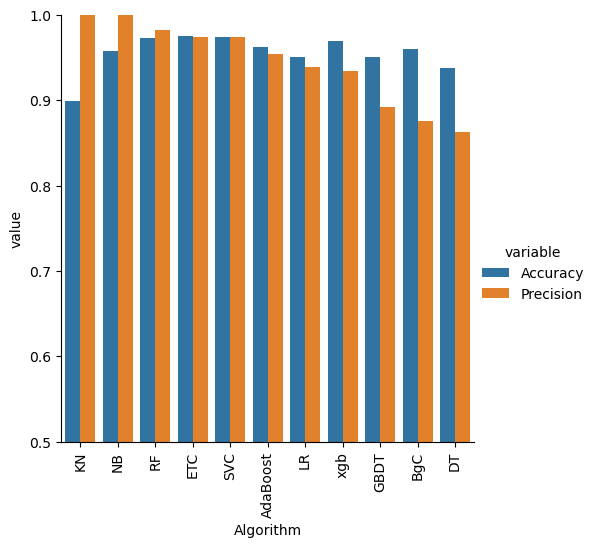

In [ ]:
sns.catplot(x = 'Algorithm' , y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height= 5)

plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

## model improvements
     1. change the max_features parameter of tfidf
     2. scaling using min max scaler for avoiding negatives (but not useful for this model)
     3. appending the num_characters col to x (but not useful for this model)
     4. voting classifier.(but not useful for this model)
     5. stacking (but not useful for this model)

In [ ]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy_max_ft_3000' : accuracy_scores,'Precision_max_ft_3000' : precision_scores}).sort_values('Precision_max_ft_3000',ascending = False)

In [ ]:
performance_df.merge(temp_df,on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.899420,1.000000,0.905222,1.000000
1,NB,0.957447,1.000000,0.970986,1.000000
2,RF,0.972921,0.982456,0.970986,0.990909
3,ETC,0.975822,0.974790,0.975822,0.974790
4,SVC,0.973888,0.974359,0.974855,0.974576
5,AdaBoost,0.962282,0.954128,0.963250,0.962963
6,LR,0.950677,0.939394,0.958414,0.970297
7,xgb,0.970019,0.934959,0.968085,0.948718
8,GBDT,0.950677,0.891892,0.946809,0.927835
9,BgC,0.960348,0.875969,0.957447,0.885246


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))